In [4]:
import tensorflow.keras as keras
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

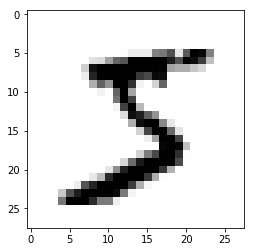

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [ ]:
print(y_train[0])

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
print(x_train[0])
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [ ]:
model = tf.keras.models.Sequential()
#A sequential model is what you're going to use most of the time.
#It just means things are going to go in direct order.
#A feed forward model. No going backwards.

model.add(tf.keras.layers.Flatten())
#Flatten layer built just

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #HiddenLAyer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #HiddenLayer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #OutputLayer1
#This is our final layer. It has 10 nodes. 1 node per possible number prediction.


#Now we need to "compile" the model. 
#This is where we pass the settings for actually optimizing/training the model we've defined
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#Getting a high accuracy and low loss might mean your model learned how to classify digits in general (it generalized)
#or it simply memorized every single example you showed it (it overfit). 
#This is why we need to test on out-of-sample data (data we didn't use to train the model).
model.fit(x_train, y_train, epochs=3)

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

Epoch 1/3
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2608 - acc: 0.9240
Epoch 2/3
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1071 - acc: 0.9673
Epoch 3/3
10000/10000 [==============================] - 1s 56us/sample - loss: 0.0970 - acc: 0.9702
0.0969563519898802
0.9702
[[3.55678509e-07 8.01290423e-10 9.71296049e-06 ... 9.99988437e-01
  1.24794495e-08 1.33988991e-07]
 [2.86255585e-07 1.91503685e-04 9.99781311e-01 ... 4.53893900e-09
  8.67006918e-07 8.69714370e-12]
 [6.44626653e-06 9.99118984e-01 2.50243116e-04 ... 1.24225247e-04
  4.16208844e-04 1.24886992e-06]
 ...
 [2.90326767e-07 8.19472189e-06 6.60475692e-08 ... 1.81663912e-04
  6.72719616e-05 1.92967488e-03]
 [1.82511121e-05 3.69688314e-06 1.62362952e-07 ... 7.47832155e-06
  1.59748236e-03 1.37538132e-06]
 [8.26213454e-06 6.38823705e-09 2.78529711e-07 ... 8.63005934e-12
  3.14731032e-08 1.92794114e-09]]
7


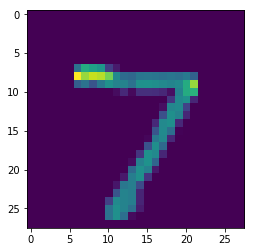

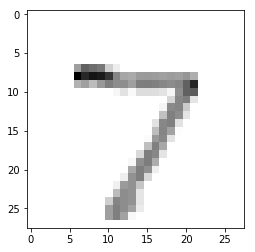

In [12]:
import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model

val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy


model.save('epic_num_reader.model')
#Load it back
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict(x_test)
print(predictions)


import numpy as np

print(np.argmax(predictions[0]))

#plt.cm.binary makes the image black and white
plt.imshow(x_test[0])
plt.show()
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()
